# When do most traffic-related deaths occur?

The dataset is taken from data.gov.uk and contains all traffic-related deaths in the UK in 2015. Below is a simple visualisation relating to the timing of the accidents. 

Source: https://data.gov.uk/dataset/road-accidents-safety-data/resource/ceb00cff-443d-4d43-b17a-ee13437e9564
<br>

### Preprocessing 

In [1024]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1025]:
# The original dataset
df = pd.read_csv("UK_Traffic_Accidents_2015.csv")
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [1026]:
df = pd.read_csv("UK_Traffic_Accidents_2015.csv", usecols=["Day_of_Week", "Time"])
df.dropna(inplace=True)
df.head()

,Day_of_Week,Time
0,2,18:45
1,2,07:50
2,2,18:08
3,3,07:40
4,6,07:30


In [1027]:
df['Time'] = df['Time'].map(lambda x: str(x)[:-3])
df.head()

,Day_of_Week,Time
0,2,18
1,2,07
2,2,18
3,3,07
4,6,07


In [1028]:
# Convert "Day_of_Week" to string
df["Day_of_Week"] = df["Day_of_Week"].astype(str)

In [1029]:
# Adding column for ordering the days of the week
df['Day'] = df["Day_of_Week"]
df.head()

,Day_of_Week,Time,Day
0,2,18,2
1,2,07,2
2,2,18,2
3,3,07,3
4,6,07,6


In [1030]:
df["Day_of_Week"] = df["Day_of_Week"].replace("1", "Monday")
df["Day_of_Week"] = df["Day_of_Week"].replace("2", "Tuesday")
df["Day_of_Week"] = df["Day_of_Week"].replace("3", "Wednesday")
df["Day_of_Week"] = df["Day_of_Week"].replace("4", "Thursday")
df["Day_of_Week"] = df["Day_of_Week"].replace("5", "Friday")
df["Day_of_Week"] = df["Day_of_Week"].replace("6", "Saturday")
df["Day_of_Week"] = df["Day_of_Week"].replace("7", "Sunday")

df.head()

,Day_of_Week,Time,Day
0,Tuesday,18,2
1,Tuesday,07,2
2,Tuesday,18,2
3,Wednesday,07,3
4,Saturday,07,6


In [1031]:
# Using .ctrosstab() to create a pivot table
df_pivot = pd.crosstab(df["Day_of_Week"], df["Time"])
df_pivot

Time,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Friday,213,142,102,105,90,152,449,1243,1927,1050,...,1206,1670,1889,2113,1691,1194,804,564,504,366
Monday,517,418,334,290,224,195,229,293,331,522,...,1117,1095,1122,1087,907,731,651,522,409,302
Saturday,216,157,114,79,73,172,426,1004,1667,1025,...,1421,1936,1908,2022,1568,1202,887,695,646,540
Sunday,432,357,325,240,182,189,222,348,514,771,...,1272,1213,1180,1250,1185,980,700,632,641,574
Thursday,158,108,60,67,64,180,529,1307,2095,1185,...,1168,1619,1880,2137,1513,1106,718,559,460,311
Tuesday,212,138,73,77,79,175,437,1096,1726,1031,...,1199,1632,1776,1902,1429,992,714,509,414,277
Wednesday,194,109,76,61,57,176,459,1239,1993,1204,...,1128,1675,1840,2222,1613,1135,757,556,467,292


In [1032]:
# Making the index chronological
df_pivot = df_pivot.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_pivot

Time,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Monday,517,418,334,290,224,195,229,293,331,522,...,1117,1095,1122,1087,907,731,651,522,409,302
Tuesday,212,138,73,77,79,175,437,1096,1726,1031,...,1199,1632,1776,1902,1429,992,714,509,414,277
Wednesday,194,109,76,61,57,176,459,1239,1993,1204,...,1128,1675,1840,2222,1613,1135,757,556,467,292
Thursday,158,108,60,67,64,180,529,1307,2095,1185,...,1168,1619,1880,2137,1513,1106,718,559,460,311
Friday,213,142,102,105,90,152,449,1243,1927,1050,...,1206,1670,1889,2113,1691,1194,804,564,504,366
Saturday,216,157,114,79,73,172,426,1004,1667,1025,...,1421,1936,1908,2022,1568,1202,887,695,646,540
Sunday,432,357,325,240,182,189,222,348,514,771,...,1272,1213,1180,1250,1185,980,700,632,641,574


<br>

### Visualization

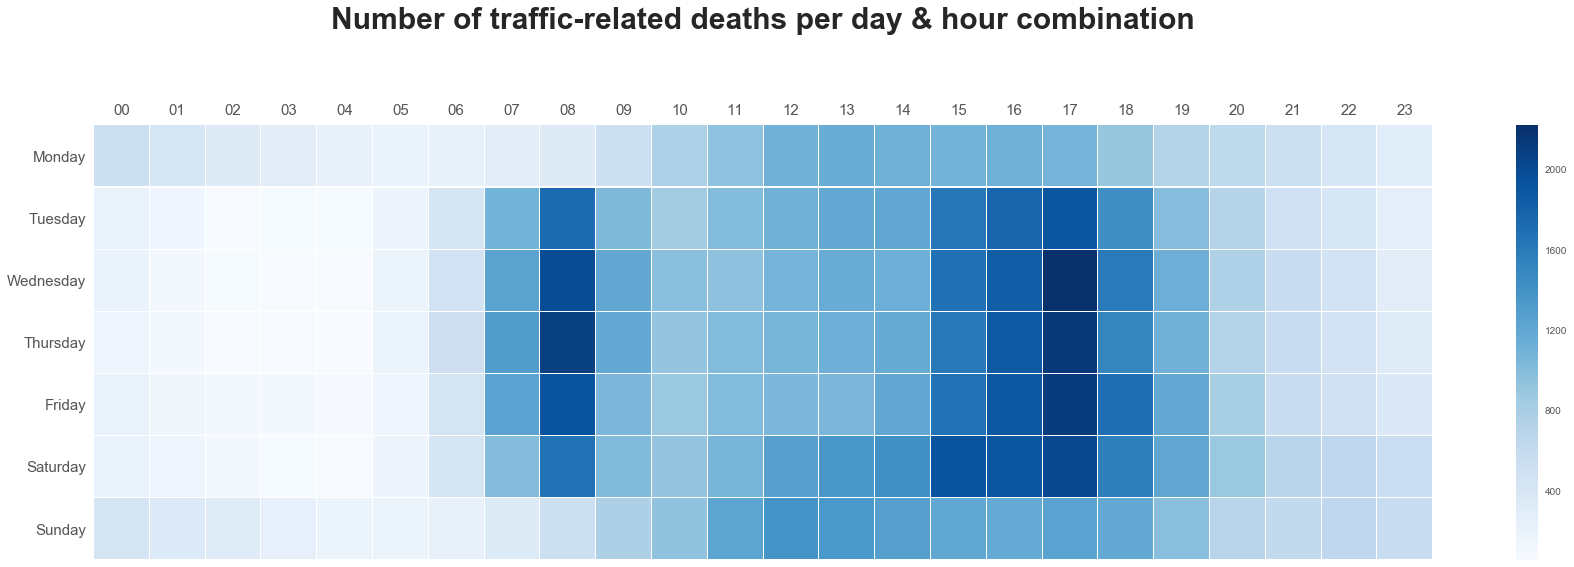

In [1033]:
fig, ax = plt.subplots(figsize=(30,8))
graph = sns.heatmap(df_pivot, cmap="Blues", linecolor="white", linewidths=0.1)

ax.set_title("Number of traffic-related deaths per day & hour combination", fontsize=30, fontweight="bold", y=1.06)

ax.set_xlabel("")
ax.set_ylabel("")

locs, labels = plt.yticks() # Rotating row labels
plt.setp(labels, rotation=0) # Rotating row labels

ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top') # x axis on top

graph.tick_params(axis='both',labelsize=15) # Tick label size
graph